In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.Fast_BNN import FastPosteriorBNN
import torch
import matplotlib.pyplot as plt

# 2 Dim

changing model batch size to 10000 (note that this will be occuring often if this message comes up during training


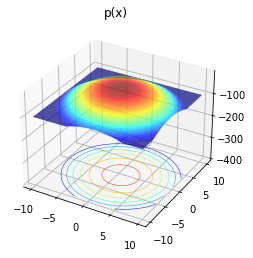

In [3]:
posterior_bnn = FastPosteriorBNN(n_datapoints=2, x_dim=1, y_dim=1, n_hidden_layers=0, layer_width=0
                             , linear_activations=False, fixed_variance=True, use_bias=True)

assert posterior_bnn.n_parameters == 2
from Utils.plotting_utils import plot_distribution

plot_distribution(posterior_bnn, n_points=100)
plt.show()

changing model batch size to 10000 (note that this will be occuring often if this message comes up during training


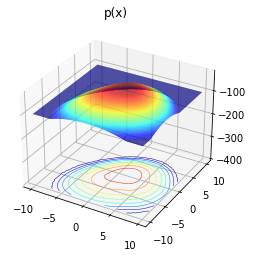

In [4]:
posterior_bnn = FastPosteriorBNN(n_datapoints=10, x_dim=1, y_dim=1, n_hidden_layers=0, layer_width=0
                             , linear_activations=False, fixed_variance=True, use_bias=True, 
                                 linear_activations_output=False)

assert posterior_bnn.n_parameters == 2
from Utils.plotting_utils import plot_distribution
import matplotlib.pyplot as plt

plot_distribution(posterior_bnn, n_points=100)
plt.show()

changing model batch size to 10000 (note that this will be occuring often if this message comes up during training


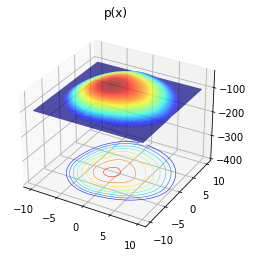

In [5]:
posterior_bnn = FastPosteriorBNN(n_datapoints=10, x_dim=1, y_dim=2, n_hidden_layers=0, layer_width=0
                             , linear_activations=False, fixed_variance=True, use_bias=False, 
                                 linear_activations_output=False)

assert posterior_bnn.n_parameters == 2
from Utils.plotting_utils import plot_distribution
import matplotlib.pyplot as plt

plot_distribution(posterior_bnn, n_points=100)
plt.show()

# Let's Train

In [3]:
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import torch
from AIS_train.train_AIS import AIS_trainer

In [59]:
torch.manual_seed(2)
n_plots = 5
epochs = 10
step_size = 1.0
batch_size = int(1e3)

n_samples_estimation = int(1e4)
flow_type = "RealNVP" # "ReverseIAF"  # "ReverseIAF_MIX" #"ReverseIAF" #IAF"  # 
n_flow_steps = 3

In [60]:
target = FastPosteriorBNN(n_datapoints=2, x_dim=1, y_dim=1, n_hidden_layers=1, layer_width=5,
                             fixed_variance=True)
print(target.model.n_parameters)

16


In [61]:
dim = target.n_parameters

In [62]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=3.0, flow_type=flow_type, n_flow_steps=n_flow_steps)
tester = AIS_trainer(target, learnt_sampler, n_distributions=6, n_steps_transition_operator=2,
                     step_size=step_size, train_AIS_params=False, loss_type=False,  # "DReG",
                     transition_operator="HMC", learnt_dist_kwargs={"lr": 5e-4},
                     loss_type_2="alpha_2")

setting device as cpu


In [63]:
history = tester.train(epochs, batch_size=batch_size)

  0%|                                                                                                                                      | 0/10 [00:00<?, ?it/s]

changing model batch size to 1000 (note that this will be occuring often if this message comes up during training


loss: 2.138114470492297,log_p_x_post_AIS -305.1277157729424,ESS 0.0002016549817988302: 100%|██████████████████████████████████████| 10/10 [01:29<00:00,  8.97s/it]


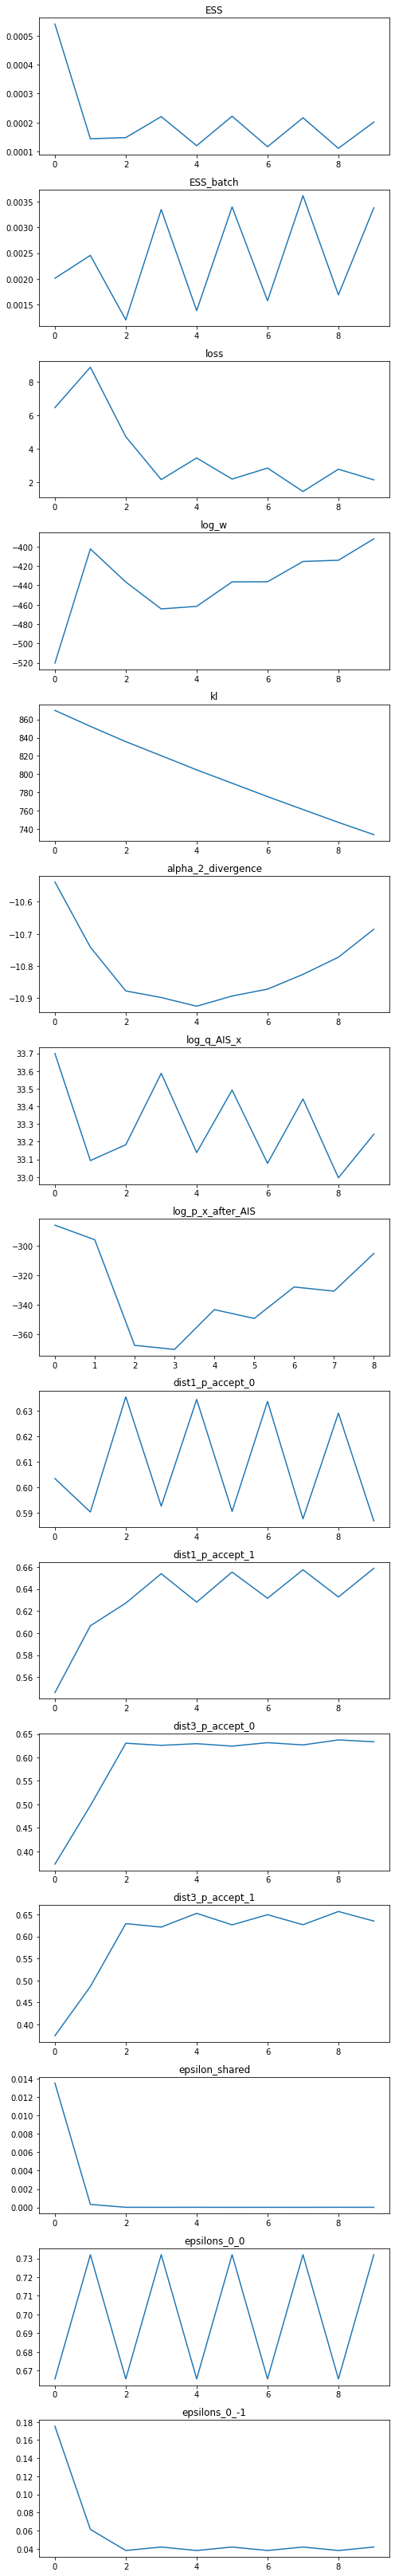

In [70]:
plot_history(history)

## Look at data generating process

In [71]:
x_space = torch.linspace(-15, 15, 20)[:, None, None]
posterior = target.target.model.posterior_y_given_x(x_space)
mean = posterior.loc.detach()
upper_bound = torch.squeeze(mean) + torch.squeeze(torch.sqrt(posterior.covariance_matrix)*1.96).detach()
lower_bound = torch.squeeze(mean) - torch.squeeze(torch.sqrt(posterior.covariance_matrix)*1.96).detach()

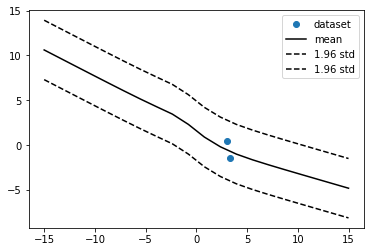

In [72]:
plt.plot(torch.squeeze(target.X), torch.squeeze(target.Y), "o", label = "dataset")
plt.plot(torch.squeeze(x_space), torch.squeeze(mean), "-", c="black", label="mean")
plt.plot(torch.squeeze(x_space), torch.squeeze(upper_bound), "--", c="black", label="1.96 std")
plt.plot(torch.squeeze(x_space), torch.squeeze(lower_bound), "--", c="black", label="1.96 std")
plt.legend()

## Look at samples from flow

In [73]:
samples = 10
samples_w = learnt_sampler.sample((samples,)).detach()

In [74]:
target.set_model_parameters(samples_w)

In [75]:
x_space = torch.linspace(-10, 10, 20)[:, None, None]
posterior = target.model.posterior_y_given_x(x_space)
mean = torch.squeeze(posterior.loc.detach())

No handles with labels found to put in legend.


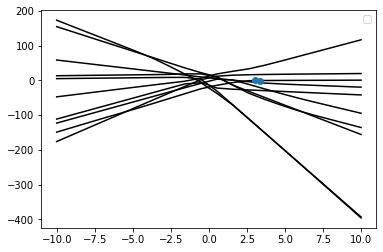

In [76]:
plt.plot(torch.squeeze(x_space), torch.squeeze(mean), "-", c="black")
plt.plot(torch.squeeze(target.X), torch.squeeze(target.Y), "o")
plt.legend()